WIP notebook to build bold diffing workflow

In [1]:
from neurovolume.functions import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Let's do something as canonical as possible:
- Assume that experimental and control are properly timed (you can add offsets later)

In [3]:
import nibabel as nib
experimental = nib.load('/Users/joachimpfefferkorn/repos/neurovolume/media/openneuro/sub-01_task-emotionalfaces_run-1_bold.nii').get_fdata()
control = nib.load('/Users/joachimpfefferkorn/repos/neurovolume/media/openneuro/sub-01_task-rest_bold.nii').get_fdata()

- [ ] **Add an offset for the control!**

In [4]:
diff = create_normalized_volume(np.clip(np.subtract(experimental, control[:,:,:,:experimental.shape[3]]), 0, None))

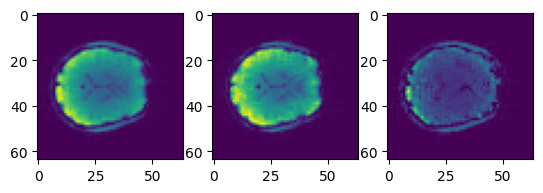

In [5]:
fig, axs = plt.subplots(1, 3)
z, t, = 16, 92

axs[0].imshow(experimental[:,:,z,t])
axs[1].imshow(control[:,:,z,t])
axs[2].imshow(diff[:,:,z,t])

In [28]:
explore_3D_vol(experimental[:,:,:,92], dim='z')

interactive(children=(IntSlider(value=17, description='slice', max=34), Output()), _dom_classes=('widget-inter…

In [29]:
output = '/Users/joachimpfefferkorn/repos/neurovolume/output/diff.npy'
with open(output, 'wb') as f:
    np.save(f, diff)

In [30]:
output = '/Users/joachimpfefferkorn/repos/neurovolume/output/experimental.npy'
with open(output, 'wb') as f:
    np.save(f, experimental)